# Major League Baseball

Major League Baseball is an American professional baseball organization and the oldest of the major professional sports leagues in the United States and Canada. 

A total of 30 teams play in Major League Baseball: 15 teams in the National League and 15 in the American League.

There are 9 players in a team

The playing field is Dimond shaped

There are four bases Home plate, First base, Second base and Third Base

One complete game has 9 innings

# PROBLEM STATEMENT

This dataset utilizes data from 2014 Major League Baseball seasons in order 
to develop an algorithm that predicts the number of wins for a given team 
in the 2015 season based on several different indicators of success. 


There are 16 different features that will be used as the inputs to the 
machine learning and the output will be a value that represents the number 
of wins. 

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# code to display rows and columns

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [6]:
df = pd.read_csv("base.csv")

In [7]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Column Description

# Problem Type

1) Given the number of  inputs the Machine learning Algorithm has to 
   predict the number of wins (W)
   
2) Target Variable is WINS

3) Solving it as a Classification problem

In [8]:
# Checking the data types

df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

#### 90 % of the datatypes are int and one is float(ERA)

In [9]:
# checking shape of data

df.shape

(30, 17)

In [10]:
# No of rows and columns

# Rows --> 30

# Columns --> 17

In [11]:
#Lets check for duplicate values

df.duplicated().sum()

0

In [12]:
# No duplicate values

In [13]:
# Lets check for missing values

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [14]:
# No null values

In [15]:
# Checking out the columns

df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [16]:
# using Describe to get an overview of data

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


# Some conclusions from the above table

1) The minimum runs scored in the 2014 season were 573 and max runs scored
   were 891

2) The At Bats(on strike to face the pitcher) the average was about 5516
   so in the complete season, there are a total of 5516 times a striker
   faces a pitcher
  
3) The the 2014 season the minimum total Hits were 1324 and a maximum of 
   1515 hits 
 
4) The highest number of Doubles scored in a season were 308

5) The highest number of Triples scored in a season where 39

6) Maximum of 232 home runs were scored in a single season

7) On Average there were 469 walks i.e when a pitcher throws four pitches      out of the strike zone

8) The maximum strikeouts in a season were 1518

9) The maximum stolen bases in a season were 134

10) A max of 799 runs were earned in the 2014 season

11) A max of 62 saves in the 2014 season

12) A max of 126 errors were committed in a season

13) The maximum number of wins in a single season was 100

<AxesSubplot:>

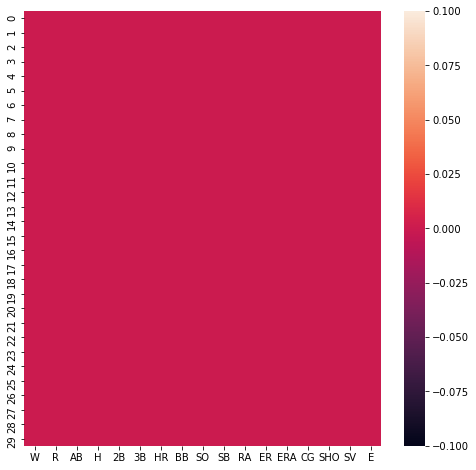

In [17]:
# Visualizing the missing values
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

In [18]:
# Luckly no missing values

# EDA

In [19]:
sns.set_theme(style="darkgrid")

In [20]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

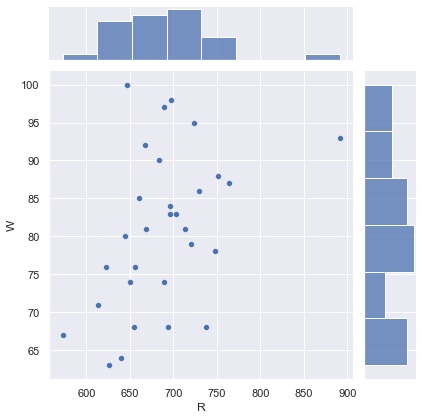

In [21]:
sns.jointplot(x="R",y="W",data=df)

- From the above plot, we can say that there is no conclusive evidence that
  if a team scores more run then that team will have more wins

- The teams who have scored (600 - 700) runs in a season also have a good
  win rate

- So more runs do not guarantee that a team will have more wins

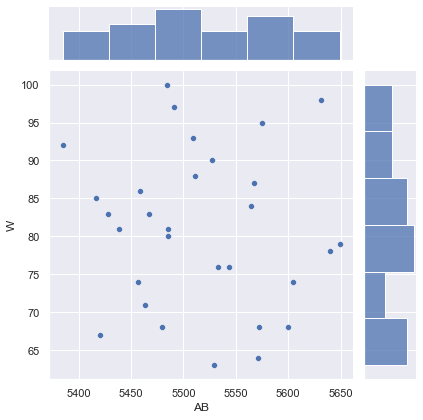

In [22]:
sns.jointplot(x="AB",y="W",data=df)

From the above plot, we can say that the more times the striker faces the pitcher higher is the chance of him scoring more runs

Like normally the more balls the striker faces the higher is the chance of scoring more runs

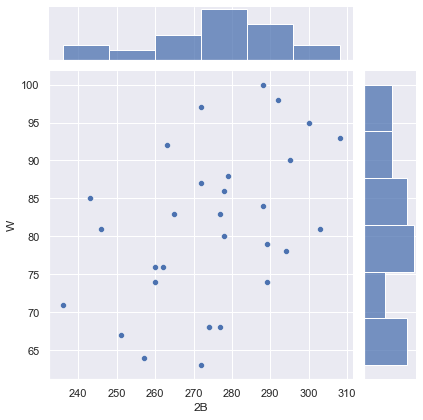

In [23]:
sns.jointplot(x="2B",y="W",data=df)

From the above plot, we can clearly say that the more the Doubles(runs) the higher is the win rate 

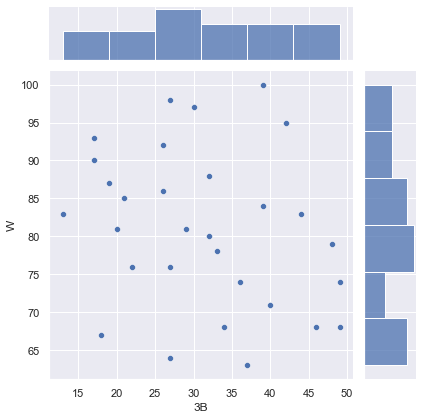

In [24]:
sns.jointplot(x="3B",y="W",data=df)

The 3B (Triples) runs will have a good impact on the Score and can also improve the overall win rate of a Team 

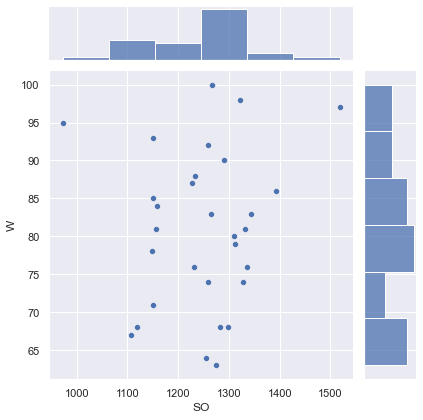

In [25]:
sns.jointplot(x="SO",y="W",data=df)

As expected the team which takes the higher Strikeouts has a higher chance of winning

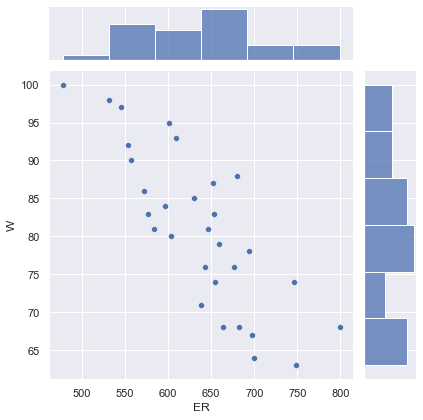

In [26]:
sns.jointplot(x="ER",y="W",data=df)

from the above plot, we can see that the higher the Earned runs the lower the win rate

So teams with higher Earned runs are not particularly having a good win rate

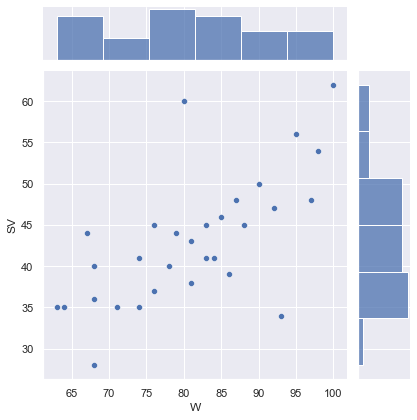

In [27]:
sns.jointplot(x="W",y="SV",data=df)

In the above plot, we can clearly see that the more the amount of Saves higher is the win rate

Saves and Wins are having somewhat a positive relationship

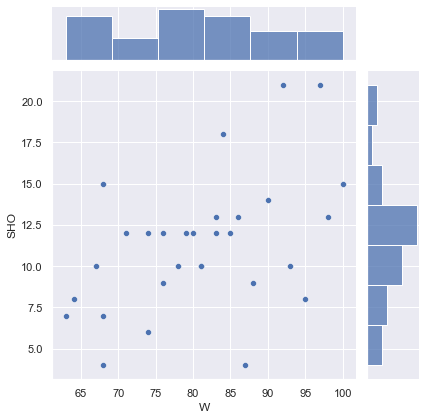

In [28]:
sns.jointplot(x="W",y="SHO",data=df)

from the above plot, we can say that teams with good pitchers will always have a higher win rate

The Higher the shutouts by a pitcher the more the chance of winning a game

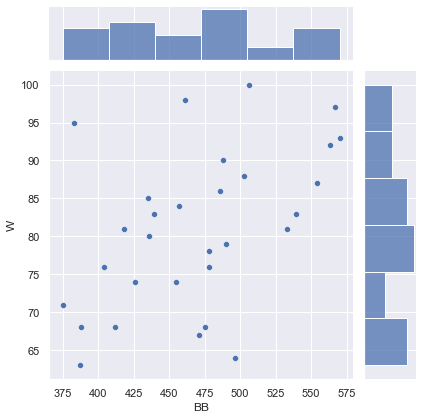

In [29]:
sns.jointplot(x="BB",y="W",data=df)

From the above plot, we can observe that if the opposition pitcher is not accurate enough then higher is the chance for the striker to get more Walks

More the Walks the striker gets higher is the chance of his team winning a game

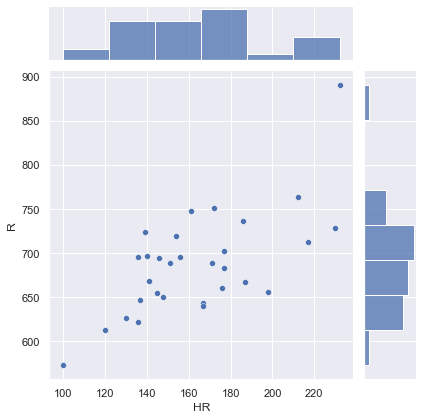

In [30]:
sns.jointplot(x="HR",y="R",data=df)

As expected more the Homeruns more will be the total runs scored

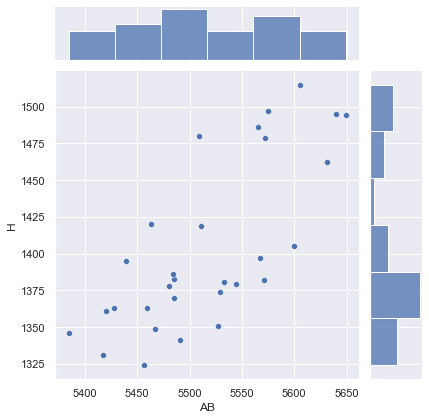

In [31]:
sns.jointplot(x="AB",y="H",data=df)

From the above plot, we can clearly see that the More times the striker is on the Home base more the amounts of Hits he gets

A very good positive correlation between At Bats and number of Hits

<AxesSubplot:xlabel='SV', ylabel='Count'>

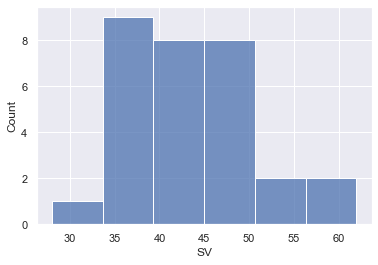

In [32]:
sns.histplot(x="SV",data=df)

Most of the saves lie in the range (35 to 50)

More Saves the team has higher are the chances of the team to win the competition.

<AxesSubplot:xlabel='SHO', ylabel='Count'>

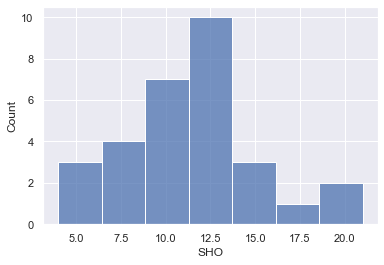

In [33]:
sns.histplot(x="SHO",data=df)

From the above plot, we can observe that there were a max of 21 shutouts in the whole season

Shutouts are considered rare, But they have a good impact on the win rate

<AxesSubplot:xlabel='ERA', ylabel='Count'>

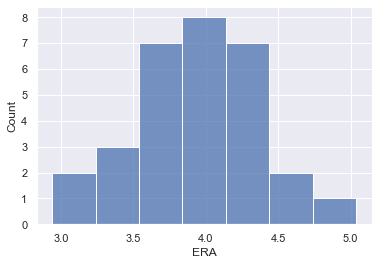

In [34]:
sns.histplot(x="ERA",data=df)

Earned Run Average (ERA) for the MLB season 2014 is between (2.9 - 5)

Lower the Earned Run Average (ERA) better is the quality of pitcher

<AxesSubplot:xlabel='RA', ylabel='Count'>

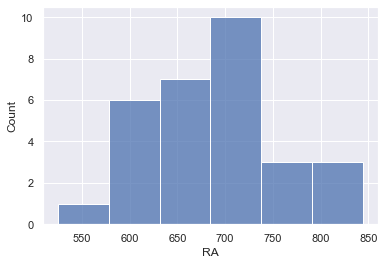

In [35]:
sns.histplot(x="RA",data=df)

The minimum runs scored against a pitcher for the year 2014 were 525

The maximum runs scored against a pitcher for the year 2014 were 844

We can say that the lesser the runs scored against a pitcher higher are the chance of his team winning

<AxesSubplot:xlabel='SB', ylabel='Count'>

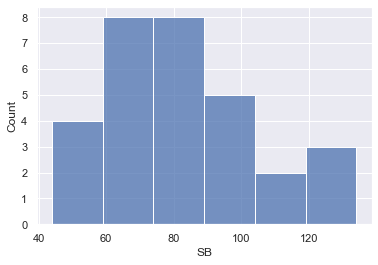

In [36]:
sns.histplot(x="SB",data=df)

On average there were 84 stolen bases in the 2014 season

Stolen bases have an important factor in deciding close games where every run is crucial


<AxesSubplot:xlabel='R', ylabel='W'>

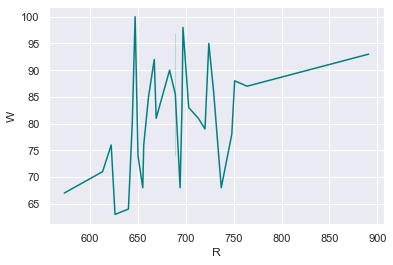

In [37]:
sns.lineplot(x="R",y="W",data=df,color="teal")

In the above plot, we can observe that there are high spikes in the range of 650 to 750 which is displaying a high win rate 

If a certain team scores less than 500 runs in the whole season there is very low chance of them winning the league

<AxesSubplot:xlabel='SHO', ylabel='W'>

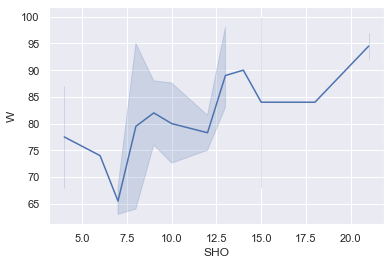

In [38]:
sns.lineplot(x="SHO",y="W",data=df)

Win rate increases with increase in the amount of Shutouts

We can say that a good pitcher will win a lot of games for his team

<AxesSubplot:xlabel='BB', ylabel='W'>

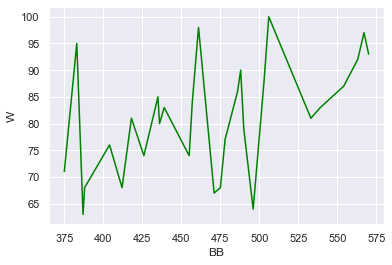

In [39]:
sns.lineplot(x="BB",y="W",data=df,color="Green")

The more the Walks (the safest medium to get a run) the higher chance of scoring more runs 

<AxesSubplot:xlabel='HR', ylabel='W'>

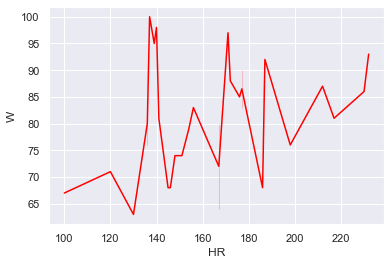

In [40]:
sns.lineplot(x="HR",y="W",data=df,color="red")

Home Runs are good but we cannot say that they are the most important factor for a team to win more matches

In [41]:
# Lets check the correlation of inputs with target variable

In [42]:
co = df.corr()

<AxesSubplot:>

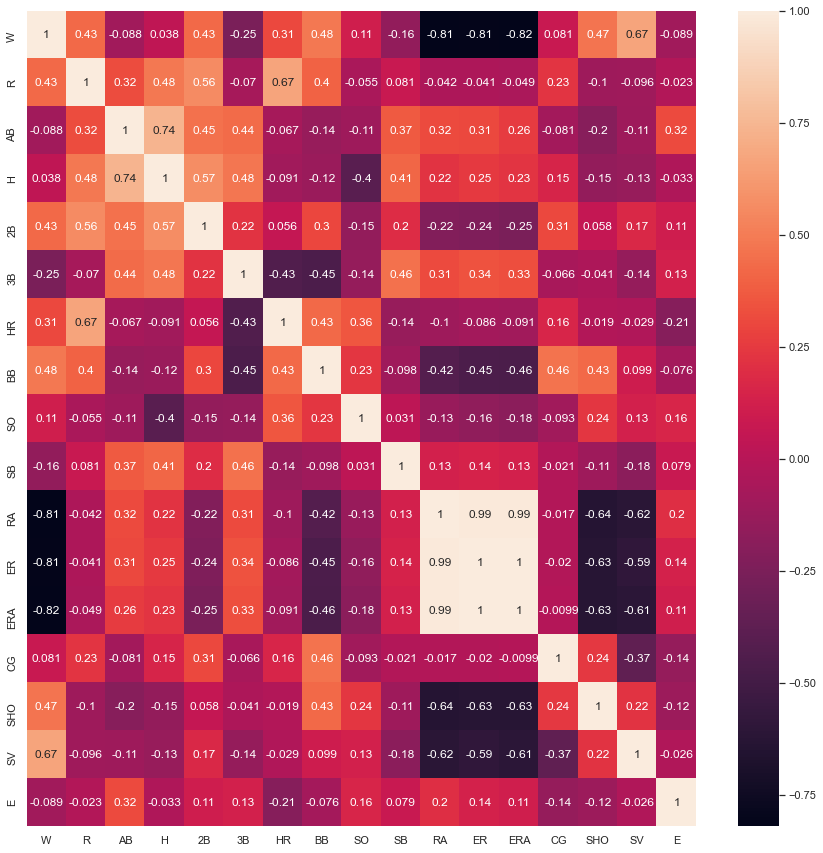

In [43]:
plt.figure(figsize=(15,15))
sns.heatmap(data=co,annot=True)

- The Saves Attribute is having the highest correlation with the target variable Wins

- Shutouts Attribute is also having an impact on the target variable

- Walks attribute is having good correlation with the target variable

- The Runs attribute is also having some good correlation with target variable

- Doubles is having some good correlation with target variable

- Home is having some good correlation with target variable

In [44]:
# Scatter plots for correlation more than 40 with target variable

Text(0, 0.5, 'Number of wins')

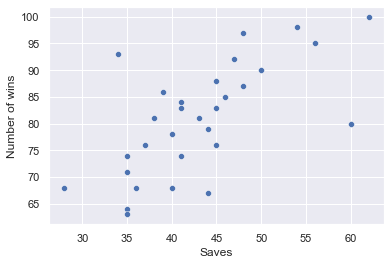

In [45]:
sns.scatterplot(x="SV",y="W",data=df)
plt.xlabel("Saves")
plt.ylabel("Number of wins")

- A good linear relationship between Saves and wins

- Higher the saves higher the wins

- A good pitcher will diliver more wins

Text(0, 0.5, 'Number of wins')

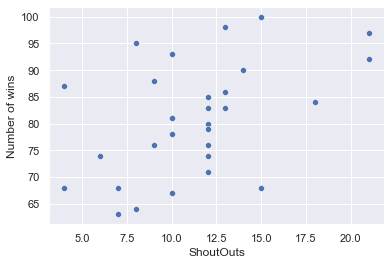

In [46]:
sns.scatterplot(x="SHO",y="W",data=df)
plt.xlabel("ShoutOuts")
plt.ylabel("Number of wins")

- A good linear relationship between ShoutOuts and wins

- Higher the shoutouts higher the wins

- shoutouts are very rare and difficult to achieve

Text(0, 0.5, 'Number of wins')

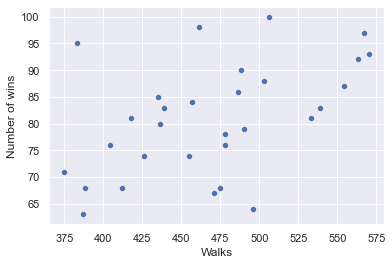

In [47]:
sns.scatterplot(x="BB",y="W",data=df)
plt.xlabel("Walks")
plt.ylabel("Number of wins")

- A good linear relationship between Walks and wins

- Higher the Waks higher the wins

- Walks are good for the strikers as they are the safest way to get runs on   the bord

# Data Cleaning

 There are no missing values in the dataset

In [48]:
from scipy import stats

In [49]:
# creating function to count outliers
def outliers(cname):
    Q1 = df[cname].quantile(0.25)
    Q3 = df[cname].quantile(0.75)
    IQR = stats.iqr(df[cname])
    print('The first quartile :',Q1,'for',cname)
    print('The third quartile :',Q3,'for',cname)
    print('The IQR :', IQR,'for',cname)
    
    L_outlier = Q1 - 1.5*(Q3 - Q1)  
    U_outlier = Q3 + 1.5*(Q3 - Q1)

    print('The left outlier :',L_outlier,'for',cname)
    print('The Right outlier :',U_outlier,'for',cname)
    
    print("Left Outliers :",df[df[cname] < L_outlier][cname].count())
    print("Right Outliers :",df[df[cname] > U_outlier][cname].count())

In [50]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Clecking Outliers

In [51]:
# Lets check some box plots

<AxesSubplot:xlabel='R'>

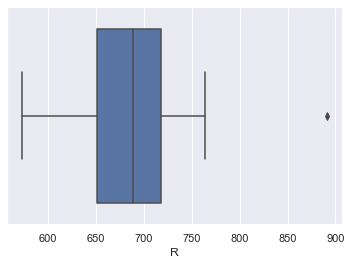

In [52]:
sns.boxplot(x="R",data=df)

In [53]:
outliers("R")

The first quartile : 651.25 for R
The third quartile : 718.25 for R
The IQR : 67.0 for R
The left outlier : 550.75 for R
The Right outlier : 818.75 for R
Left Outliers : 0
Right Outliers : 1


In [54]:
# There is one outlier in Run

<AxesSubplot:xlabel='AB'>

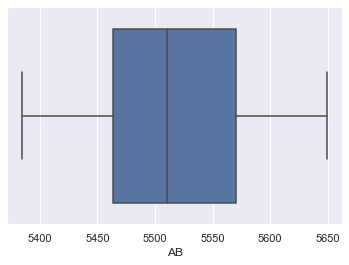

In [55]:
sns.boxplot(x="AB",data=df)

In [56]:
outliers("AB")

The first quartile : 5464.0 for AB
The third quartile : 5570.0 for AB
The IQR : 106.0 for AB
The left outlier : 5305.0 for AB
The Right outlier : 5729.0 for AB
Left Outliers : 0
Right Outliers : 0


In [57]:
# No outliers in At Bats

<AxesSubplot:xlabel='H'>

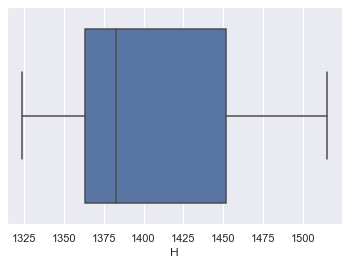

In [58]:
sns.boxplot(x="H",data=df)

In [59]:
outliers("H")

The first quartile : 1363.0 for H
The third quartile : 1451.5 for H
The IQR : 88.5 for H
The left outlier : 1230.25 for H
The Right outlier : 1584.25 for H
Left Outliers : 0
Right Outliers : 0


In [60]:
# No outliers in Hits

<AxesSubplot:xlabel='2B'>

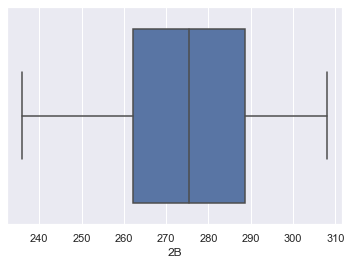

In [61]:
sns.boxplot(x="2B",data=df)

In [62]:
outliers("2B")

The first quartile : 262.25 for 2B
The third quartile : 288.75 for 2B
The IQR : 26.5 for 2B
The left outlier : 222.5 for 2B
The Right outlier : 328.5 for 2B
Left Outliers : 0
Right Outliers : 0


In [63]:
# No outliers in Doubles

<AxesSubplot:xlabel='3B'>

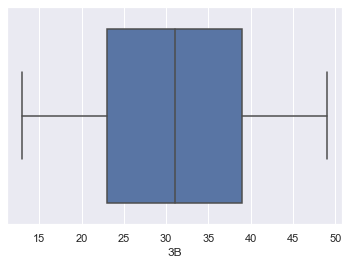

In [64]:
sns.boxplot(x="3B",data=df)

In [65]:
outliers("3B")

The first quartile : 23.0 for 3B
The third quartile : 39.0 for 3B
The IQR : 16.0 for 3B
The left outlier : -1.0 for 3B
The Right outlier : 63.0 for 3B
Left Outliers : 0
Right Outliers : 0


In [66]:
# No outliers in Triples

<AxesSubplot:xlabel='HR'>

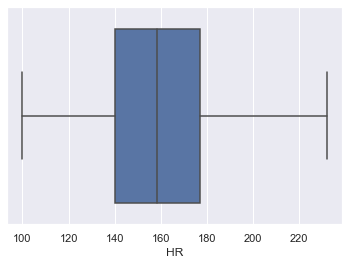

In [67]:
sns.boxplot(x="HR",data=df)

In [68]:
outliers("HR")

The first quartile : 140.25 for HR
The third quartile : 177.0 for HR
The IQR : 36.75 for HR
The left outlier : 85.125 for HR
The Right outlier : 232.125 for HR
Left Outliers : 0
Right Outliers : 0


In [69]:
# No outliers in HR

<AxesSubplot:xlabel='BB'>

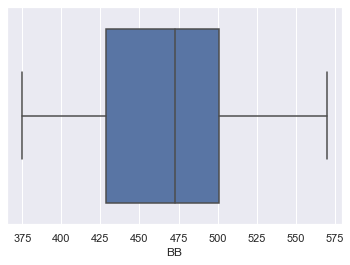

In [70]:
sns.boxplot(x="BB",data=df)

In [71]:
outliers("BB")

The first quartile : 428.25 for BB
The third quartile : 501.25 for BB
The IQR : 73.0 for BB
The left outlier : 318.75 for BB
The Right outlier : 610.75 for BB
Left Outliers : 0
Right Outliers : 0


In [72]:
# No outliers in Walks

<AxesSubplot:xlabel='SO'>

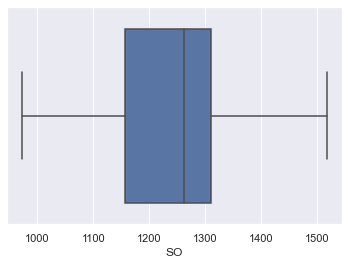

In [73]:
sns.boxplot(x="SO",data=df)

In [74]:
outliers("SO")

The first quartile : 1157.5 for SO
The third quartile : 1311.5 for SO
The IQR : 154.0 for SO
The left outlier : 926.5 for SO
The Right outlier : 1542.5 for SO
Left Outliers : 0
Right Outliers : 0


In [75]:
# No outliers in Strikeouts

<AxesSubplot:xlabel='SB'>

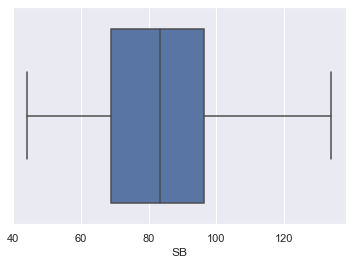

In [76]:
sns.boxplot(x="SB",data=df)

In [77]:
outliers("SB")

The first quartile : 69.0 for SB
The third quartile : 96.5 for SB
The IQR : 27.5 for SB
The left outlier : 27.75 for SB
The Right outlier : 137.75 for SB
Left Outliers : 0
Right Outliers : 0


In [78]:
# No outliers in Stolen Bases

<AxesSubplot:xlabel='RA'>

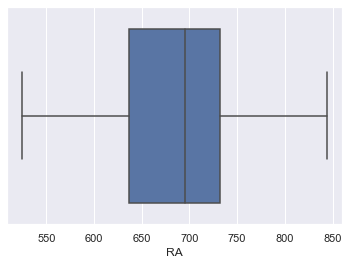

In [79]:
sns.boxplot(x="RA",data=df)

In [80]:
outliers("RA")

The first quartile : 636.25 for RA
The third quartile : 732.5 for RA
The IQR : 96.25 for RA
The left outlier : 491.875 for RA
The Right outlier : 876.875 for RA
Left Outliers : 0
Right Outliers : 0


In [81]:
# No outliers in RA

<AxesSubplot:xlabel='ER'>

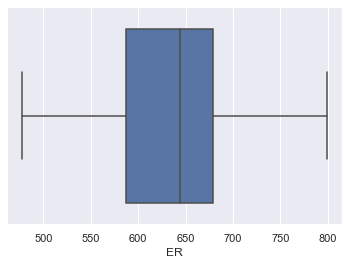

In [82]:
sns.boxplot(x="ER",data=df)

In [83]:
outliers("ER")

The first quartile : 587.25 for ER
The third quartile : 679.25 for ER
The IQR : 92.0 for ER
The left outlier : 449.25 for ER
The Right outlier : 817.25 for ER
Left Outliers : 0
Right Outliers : 0


In [84]:
# No outliers in ER

<AxesSubplot:xlabel='ERA'>

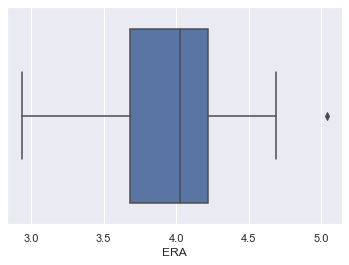

In [85]:
sns.boxplot(x="ERA",data=df)

In [86]:
outliers("ERA")

The first quartile : 3.6825 for ERA
The third quartile : 4.220000000000001 for ERA
The IQR : 0.5375000000000005 for ERA
The left outlier : 2.8762499999999993 for ERA
The Right outlier : 5.026250000000001 for ERA
Left Outliers : 0
Right Outliers : 1


In [87]:
# one outlier in ERA

<AxesSubplot:xlabel='CG'>

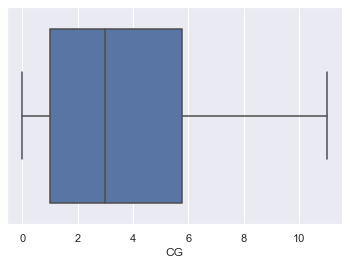

In [88]:
sns.boxplot(x="CG",data=df)

In [89]:
outliers("CG")

The first quartile : 1.0 for CG
The third quartile : 5.75 for CG
The IQR : 4.75 for CG
The left outlier : -6.125 for CG
The Right outlier : 12.875 for CG
Left Outliers : 0
Right Outliers : 0


In [90]:
# No outlier in CG

<AxesSubplot:xlabel='SHO'>

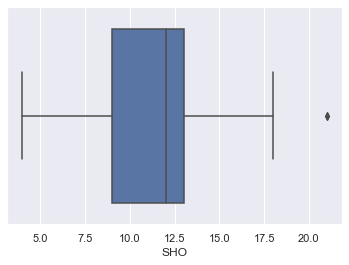

In [91]:
sns.boxplot(x="SHO",data=df)

In [92]:
outliers("SHO")

The first quartile : 9.0 for SHO
The third quartile : 13.0 for SHO
The IQR : 4.0 for SHO
The left outlier : 3.0 for SHO
The Right outlier : 19.0 for SHO
Left Outliers : 0
Right Outliers : 2


In [93]:
# Some outliers in SHO

<AxesSubplot:xlabel='SV'>

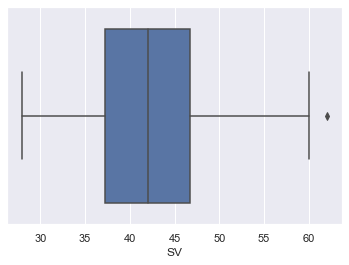

In [94]:
sns.boxplot(x="SV",data=df)

In [95]:
outliers("SV")

The first quartile : 37.25 for SV
The third quartile : 46.75 for SV
The IQR : 9.5 for SV
The left outlier : 23.0 for SV
The Right outlier : 61.0 for SV
Left Outliers : 0
Right Outliers : 1


In [96]:
# One outliers in SV

<AxesSubplot:xlabel='E'>

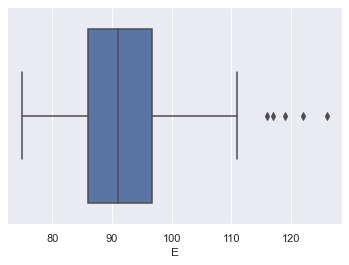

In [97]:
sns.boxplot(x="E",data=df)

In [98]:
outliers("E")

The first quartile : 86.0 for E
The third quartile : 96.75 for E
The IQR : 10.75 for E
The left outlier : 69.875 for E
The Right outlier : 112.875 for E
Left Outliers : 0
Right Outliers : 5


In [99]:
# Some outliers in Errors 

There are some outliers in 
- Errors
- Saves
- Shoutouts 
- Earned Run Average
- Runs

There are outliers in the data we need to handle them

## Removing outliers 

z-score technique

In [100]:
from scipy.stats import zscore

In [101]:
z = np.abs(zscore(df))

In [102]:
z.shape

(30, 17)

In [103]:
threshold = 3
print(np.where(z > 3))

(array([5], dtype=int64), array([1], dtype=int64))


In [104]:
df_new = df[(z < 3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


## % Data Loss

In [105]:
loss = (30 - 29)/30*100
print(loss)

3.3333333333333335


## Only 3 % of the data was lost  

## Checking Skewness

In [106]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [107]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

## Log Transformation

In [108]:
df["R"] = np.log(df["R"] + 1)

In [109]:
df["R"].skew()

0.7448127056070601

In [110]:
df["CG"] = np.log(df["CG"] + 1)

In [111]:
df["CG"].skew()

-0.32596212768313904

In [112]:
df["H"] = np.log(df["H"] + 1)

In [113]:
df["H"].skew()

0.6285836461515344

In [114]:
df["E"] = np.log(df["E"] + 1)

In [115]:
df["E"].skew()

0.6329162963355313

In [116]:
df.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO    0.565790
SV     0.657524
E      0.632916
dtype: float64

In [117]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,8,56,4.488636
1,83,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,12,45,4.465908
2,81,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,10,38,4.382027
3,76,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,9,37,4.624973
4,74,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,12,35,4.465908


## Train Test Split

In [118]:
X = df.drop("W",axis=1)
y = df["W"]

In [119]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,8,56,4.488636
1,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,12,45,4.465908
2,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,10,38,4.382027
3,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,9,37,4.624973
4,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,12,35,4.465908


In [120]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [121]:
X = X.values
y = y.values

In [122]:
X

array([[6.58617165e+00, 5.57500000e+03, 7.31188616e+00, 3.00000000e+02,
        4.20000000e+01, 1.39000000e+02, 3.83000000e+02, 9.73000000e+02,
        1.04000000e+02, 6.41000000e+02, 6.01000000e+02, 3.73000000e+00,
        1.09861229e+00, 8.00000000e+00, 5.60000000e+01, 4.48863637e+00],
       [6.54678541e+00, 5.46700000e+03, 7.20785987e+00, 2.77000000e+02,
        4.40000000e+01, 1.56000000e+02, 4.39000000e+02, 1.26400000e+03,
        7.00000000e+01, 7.00000000e+02, 6.53000000e+02, 4.07000000e+00,
        1.09861229e+00, 1.20000000e+01, 4.50000000e+01, 4.46590812e+00],
       [6.50727771e+00, 5.43900000e+03, 7.24136628e+00, 3.03000000e+02,
        2.90000000e+01, 1.41000000e+02, 5.33000000e+02, 1.15700000e+03,
        8.60000000e+01, 6.40000000e+02, 5.84000000e+02, 3.67000000e+00,
        2.48490665e+00, 1.00000000e+01, 3.80000000e+01, 4.38202663e+00],
       [6.43454652e+00, 5.53300000e+03, 7.23128700e+00, 2.60000000e+02,
        2.70000000e+01, 1.36000000e+02, 4.04000000e+02, 1.231

In [123]:
y

array([ 95,  83,  81,  76,  74,  93,  87,  81,  80,  78,  88,  86,  85,
        76,  68, 100,  98,  97,  68,  64,  90,  83,  71,  67,  63,  92,
        84,  79,  74,  68], dtype=int64)

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [126]:
X_train.shape

(22, 16)

In [127]:
X_test.shape

(8, 16)

In [128]:
y_train.shape

(22,)

In [129]:
y_test.shape

(8,)

## Scaling

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
sc = StandardScaler()

In [132]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [133]:
X_train

array([[ 0.05085464, -0.34221207, -1.12427529, -0.064963  , -0.04149842,
         0.238514  ,  1.63281946,  2.59496835,  0.75326347, -1.03483992,
        -1.17950691, -1.20103574,  1.12393791,  2.26871303,  0.48152362,
         1.26247411],
       [-1.28079604, -0.73771421,  0.3187129 , -1.97054423,  0.87146683,
        -1.41341629, -1.55877211, -0.8266707 ,  1.54239662, -0.08283665,
         0.08362642,  0.1841143 , -1.82012743,  0.12964074, -1.01538677,
        -1.45661852],
       [ 2.98096384, -0.0879607 ,  1.36202423,  1.84061824, -1.22835324,
         2.21435218,  1.68268807, -0.81737277,  0.42832629, -0.19163702,
        -0.31453518, -0.27760238,  1.32596427, -0.34570865, -1.13053373,
        -0.46509535],
       [ 0.18239747,  1.63529859,  1.05353621,  0.99369324, -0.31538799,
        -0.76560049, -0.12920506,  0.77257364,  0.89252226, -1.19804049,
        -1.37172285, -1.51584257, -1.82012743,  0.36731544,  1.17240535,
         1.96658279],
       [-0.71873225, -0.42696253, -0

In [134]:
X_test

array([[-0.2847935 , -1.07671603, -0.12906509,  1.57595418, -0.13279495,
        -0.7332097 ,  1.06764178, -0.76158517,  0.33548709, -0.59963843,
        -0.65777793, -0.55043497,  1.93941283, -0.34570865, -0.66994591,
        -1.26633837],
       [-0.61307211, -0.82246466, -1.44588561, -0.70015674,  0.50628073,
        -0.50647417, -0.7110056 ,  0.8190633 ,  0.1498087 ,  0.63796583,
         0.31703149,  0.33102415, -0.7714302 , -1.29640745, -0.32450505,
        -0.13468326],
       [-0.50838133,  0.40641696, -0.41987119, -0.59429112, -0.77187062,
         1.11306533,  0.15338378,  0.90274469, -0.45364607,  0.5699656 ,
         0.61908511,  0.477934  ,  1.12393791,  0.12964074,  0.13608276,
         0.02523053],
       [ 1.03272944, -0.05971055,  0.30095356,  0.30556669,  0.14109463,
         0.27090479,  0.5689556 , -0.05494233,  1.03178105,  0.66516592,
         0.66027424,  0.64583097,  0.8907156 , -0.58338335,  0.13608276,
         1.7810014 ],
       [ 0.16603731,  0.70304356,  1

## Machine Learning

#### Linear Regression

In [135]:
from sklearn.metrics import r2_score

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
# Using for loop to find the best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_1 = LinearRegression() 
    mod_1.fit(X_train,y_train)
    train_score_1 = mod_1.score(X_train,y_train)
    pred_1 = mod_1.predict(X_test)
    test_score_1 = r2_score(y_test,pred_1)
    
    print("for random state ",i," The training accuracy is :",train_score_1)
    print("for random state ",i," The testing accuracy is :",test_score_1)
    print("\n")

for random state  0  The training accuracy is : 0.9724716863944652
for random state  0  The testing accuracy is : 0.24819359589064627


for random state  1  The training accuracy is : 0.9757505876090029
for random state  1  The testing accuracy is : 0.5000493759464629


for random state  2  The training accuracy is : 0.9892365521599998
for random state  2  The testing accuracy is : -1.4925000358367728


for random state  3  The training accuracy is : 0.9666659441573516
for random state  3  The testing accuracy is : 0.6080368084085817


for random state  4  The training accuracy is : 0.9677248674978384
for random state  4  The testing accuracy is : 0.643686460351286


for random state  5  The training accuracy is : 0.9482747823859149
for random state  5  The testing accuracy is : 0.8607613230487243


for random state  6  The training accuracy is : 0.9550181282178896
for random state  6  The testing accuracy is : 0.7577994026825268


for random state  7  The training accuracy is : 0.9659

for random state  76  The training accuracy is : 0.983937266616435
for random state  76  The testing accuracy is : -0.08374554906683862


for random state  77  The training accuracy is : 0.9803680685922843
for random state  77  The testing accuracy is : 0.6184669998886375


for random state  78  The training accuracy is : 0.9645050710152628
for random state  78  The testing accuracy is : 0.42452321921557346


for random state  79  The training accuracy is : 0.976518545227059
for random state  79  The testing accuracy is : 0.03296324790268179


for random state  80  The training accuracy is : 0.9871926624974597
for random state  80  The testing accuracy is : -0.010452456098187568


for random state  81  The training accuracy is : 0.9765327210637058
for random state  81  The testing accuracy is : -0.42348563499677017


for random state  82  The training accuracy is : 0.9798868317327472
for random state  82  The testing accuracy is : 0.7412938376326531


for random state  83  The training

In [139]:
# Taking best random state as 90
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=90)
mod_1 = LinearRegression() 
mod_1.fit(X_train,y_train)
train_score_1 = mod_1.score(X_train,y_train)
pred_1 = mod_1.predict(X_test)
test_score_1 = r2_score(y_test,pred_1)
    
print("The training accuracy is :",train_score_1)
print("The testing accuracy is :",test_score_1)
print("\n")

The training accuracy is : 0.9518757753105441
The testing accuracy is : 0.884168485383935




In [140]:
from sklearn.metrics import mean_squared_error
MSE_1 = mean_squared_error(y_test,pred_1)
print(MSE_1)

11.785856612184613


### Cross validation 

In [141]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_1,X,y,cv=kfold)

kfold_accuracy_LR = np.mean(abs(K_results))

In [142]:
kfold_accuracy_LR

7.808825222778585

In [143]:
score = {"Algorithm":["Linear Regression"],
         "Training_Acc":[train_score_1],
        "R2 Score":[test_score_1],
         "MSE":[MSE_1],
        "Cross_validation":[kfold_accuracy_LR]}

final_card = pd.DataFrame(score)

In [144]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.951876,0.884168,11.785857,7.808825


### Random Forest Regression

In [145]:
from sklearn.ensemble import RandomForestRegressor

In [146]:
# Using for loop to find the best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_2 = RandomForestRegressor() 
    mod_2.fit(X_train,y_train)
    train_score_2 = mod_2.score(X_train,y_train)
    pred_2 = mod_2.predict(X_test)
    test_score_2 = r2_score(y_test,pred_2)
    
    print("for random state ",i," The training accuracy is :",train_score_2)
    print("for random state ",i," The testing accuracy is :",test_score_2)
    print("\n")

for random state  0  The training accuracy is : 0.9318527997006395
for random state  0  The testing accuracy is : 0.3767826232247289


for random state  1  The training accuracy is : 0.92258637113607
for random state  1  The testing accuracy is : 0.5849652864435619


for random state  2  The training accuracy is : 0.9412280303030303
for random state  2  The testing accuracy is : 0.239415444361464


for random state  3  The training accuracy is : 0.9369865360670706
for random state  3  The testing accuracy is : 0.5911220290974635


for random state  4  The training accuracy is : 0.9160220816354098
for random state  4  The testing accuracy is : 0.07384707273802504


for random state  5  The training accuracy is : 0.9294053407732165
for random state  5  The testing accuracy is : 0.6330451333813987


for random state  6  The training accuracy is : 0.9402725864198823
for random state  6  The testing accuracy is : 0.4913692391899288


for random state  7  The training accuracy is : 0.9212358

for random state  61  The training accuracy is : 0.9454310289273951
for random state  61  The testing accuracy is : 0.3218545236668664


for random state  62  The training accuracy is : 0.9189782163470489
for random state  62  The testing accuracy is : 0.6459330434782613


for random state  63  The training accuracy is : 0.9324411220271469
for random state  63  The testing accuracy is : 0.380934


for random state  64  The training accuracy is : 0.9187957890793295
for random state  64  The testing accuracy is : 0.5838692924872356


for random state  65  The training accuracy is : 0.9160065682556879
for random state  65  The testing accuracy is : 0.3360805362813125


for random state  66  The training accuracy is : 0.9516319568526239
for random state  66  The testing accuracy is : -0.10717586314152339


for random state  67  The training accuracy is : 0.9033985097636177
for random state  67  The testing accuracy is : 0.40614642511409194


for random state  68  The training accuracy is :

In [147]:
# Taking the best random state as 19
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=19)
mod_2 = RandomForestRegressor() 
mod_2.fit(X_train,y_train)
train_score_2 = mod_2.score(X_train,y_train)
pred_2 = mod_2.predict(X_test)
test_score_2 = r2_score(y_test,pred_2)
    
print("The training accuracy is :",train_score_2)
print("The testing accuracy is :",test_score_2)
print("\n")

The training accuracy is : 0.9122316195903535
The testing accuracy is : 0.6863232998885171




In [148]:
MSE_2 = mean_squared_error(y_test,pred_2)
print(MSE_2)

30.774625000000015


In [149]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_2,X,y,cv=kfold)

kfold_accuracy_RFR = np.mean(abs(K_results))

In [150]:
kfold_accuracy_RFR

12.473678539671718

In [151]:
score = {"Algorithm":["Linear Regression","Random Forest Regression"],
         "Training_Acc":[train_score_1,train_score_2],
        "R2 Score":[test_score_1,test_score_2],
         "MSE":[MSE_1,MSE_2],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR]}

final_card = pd.DataFrame(score)

In [152]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.951876,0.884168,11.785857,7.808825
1,Random Forest Regression,0.912232,0.686323,30.774625,12.473679


### Gradient Bosting Regressor

In [153]:
from sklearn.ensemble import GradientBoostingRegressor

In [154]:
# Using for loop to find the best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_3 = GradientBoostingRegressor() 
    mod_3.fit(X_train,y_train)
    train_score_3 = mod_3.score(X_train,y_train)
    pred_3 = mod_3.predict(X_test)
    test_score_3 = r2_score(y_test,pred_3)
    
    print("for random state ",i," The training accuracy is :",train_score_3)
    print("for random state ",i," The testing accuracy is :",test_score_3)
    print("\n")

for random state  0  The training accuracy is : 0.9999999715098554
for random state  0  The testing accuracy is : 0.05186623232403986


for random state  1  The training accuracy is : 0.9999999058229063
for random state  1  The testing accuracy is : 0.5863415077375076


for random state  2  The training accuracy is : 0.9999998638669249
for random state  2  The testing accuracy is : 0.407985030046054


for random state  3  The training accuracy is : 0.9999999904322877
for random state  3  The testing accuracy is : 0.5926192505727245


for random state  4  The training accuracy is : 0.9999999723987797
for random state  4  The testing accuracy is : -0.07326691159027754


for random state  5  The training accuracy is : 0.9999999451062661
for random state  5  The testing accuracy is : 0.599039102656554


for random state  6  The training accuracy is : 0.9999997645867482
for random state  6  The testing accuracy is : 0.47246378104472553


for random state  7  The training accuracy is : 0.999

for random state  60  The training accuracy is : 0.9999999515698955
for random state  60  The testing accuracy is : 0.606917257633632


for random state  61  The training accuracy is : 0.9999998687335169
for random state  61  The testing accuracy is : 0.2981067612301279


for random state  62  The training accuracy is : 0.9999999457420726
for random state  62  The testing accuracy is : 0.2913453396426112


for random state  63  The training accuracy is : 0.999999773859246
for random state  63  The testing accuracy is : 0.10410193385051802


for random state  64  The training accuracy is : 0.9999999552091604
for random state  64  The testing accuracy is : 0.36757451255833995


for random state  65  The training accuracy is : 0.9999999683822876
for random state  65  The testing accuracy is : -0.09791694984537869


for random state  66  The training accuracy is : 0.999999988655509
for random state  66  The testing accuracy is : -0.9034562909689645


for random state  67  The training accu

In [155]:
# using the best random state as 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
mod_3 = GradientBoostingRegressor() 
mod_3.fit(X_train,y_train)
train_score_3 = mod_3.score(X_train,y_train)
pred_3 = mod_3.predict(X_test)
test_score_3 = r2_score(y_test,pred_3)
    
print("The training accuracy is :",train_score_3)
print("The testing accuracy is :",test_score_3)
print("\n")

The training accuracy is : 0.9999999650235609
The testing accuracy is : 0.627004493906608




In [156]:
MSE_3 = mean_squared_error(y_test,pred_3)
print(MSE_3)

50.23006148724347


In [157]:
kfold = KFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_3,X,y,cv=kfold)

kfold_accuracy_GB = np.mean(abs(K_results))

In [158]:
kfold_accuracy_GB

8.88144874732645

### ADA Boosting regressor

In [159]:
from sklearn.ensemble import AdaBoostRegressor

In [160]:
# using for loop to get best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_4 = AdaBoostRegressor() 
    mod_4.fit(X_train,y_train)
    train_score_4 = mod_4.score(X_train,y_train)
    pred_4 = mod_4.predict(X_test)
    test_score_4 = r2_score(y_test,pred_4)
    
    print("for random state ",i," The training accuracy is :",train_score_4)
    print("for random state ",i," The testing accuracy is :",test_score_4)
    print("\n")

for random state  0  The training accuracy is : 0.9907363530185512
for random state  0  The testing accuracy is : 0.11604628856090826


for random state  1  The training accuracy is : 0.9867119288390203
for random state  1  The testing accuracy is : 0.6137266023823029


for random state  2  The training accuracy is : 0.993530493005283
for random state  2  The testing accuracy is : 0.007619621709774371


for random state  3  The training accuracy is : 0.9892977911814403
for random state  3  The testing accuracy is : 0.6438291515911114


for random state  4  The training accuracy is : 0.990184832412268
for random state  4  The testing accuracy is : -0.10171785052987126


for random state  5  The training accuracy is : 0.9919129165454639
for random state  5  The testing accuracy is : 0.5459809340703357


for random state  6  The training accuracy is : 0.9845522067763616
for random state  6  The testing accuracy is : 0.6412213124622224


for random state  7  The training accuracy is : 0.98

for random state  61  The training accuracy is : 0.9929051755898417
for random state  61  The testing accuracy is : 0.2006925366215695


for random state  62  The training accuracy is : 0.9909950118914044
for random state  62  The testing accuracy is : 0.41756029404515416


for random state  63  The training accuracy is : 0.9896129489107286
for random state  63  The testing accuracy is : 0.06222222222222218


for random state  64  The training accuracy is : 0.9870344796187027
for random state  64  The testing accuracy is : 0.3167598670880948


for random state  65  The training accuracy is : 0.9875384526967462
for random state  65  The testing accuracy is : 0.2848202595162488


for random state  66  The training accuracy is : 0.9904309406686814
for random state  66  The testing accuracy is : -0.44961401875421014


for random state  67  The training accuracy is : 0.9941564037399818
for random state  67  The testing accuracy is : 0.2944765968896198


for random state  68  The training ac

In [161]:
# Taking the best random state as 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=7)
mod_4 = AdaBoostRegressor() 
mod_4.fit(X_train,y_train)
train_score_4 = mod_4.score(X_train,y_train)
pred_4 = mod_4.predict(X_test)
test_score_4 = r2_score(y_test,pred_4)
    
print("The training accuracy is :",train_score_4)
print("The testing accuracy is :",test_score_4)
print("\n")

The training accuracy is : 0.9917203270005055
The testing accuracy is : 0.6291694931407951




In [162]:
MSE_4 = mean_squared_error(y_test,pred_4)
print(MSE_4)

43.1496060090703


In [163]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_4,X,y,cv=kfold)

kfold_accuracy_ADA = np.mean(abs(K_results))

In [164]:
kfold_accuracy_ADA

12.906119371325172

In [165]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA]}

final_card = pd.DataFrame(score)

In [166]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.951876,0.884168,11.785857,7.808825
1,Random Forest Regression,0.912232,0.686323,30.774625,12.473679
2,Gredient Boosting,1.000000,0.627004,50.230061,8.881449
3,ADA Boost,0.991720,0.629169,43.149606,12.906119


### KNN Regressor

In [167]:
from sklearn.neighbors import KNeighborsRegressor

In [168]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_5 = KNeighborsRegressor() 
    mod_5.fit(X_train,y_train)
    train_score_5 = mod_5.score(X_train,y_train)
    pred_5 = mod_5.predict(X_test)
    test_score_5 = r2_score(y_test,pred_5)
    
    print("for random state ",i," The training accuracy is :",train_score_5)
    print("for random state ",i," The testing accuracy is :",test_score_5)
    print("\n")

for random state  0  The training accuracy is : 0.5985276908422915
for random state  0  The testing accuracy is : 0.345296574770259


for random state  1  The training accuracy is : 0.6340228605506408
for random state  1  The testing accuracy is : 0.32097560975609785


for random state  2  The training accuracy is : 0.7204099821746881
for random state  2  The testing accuracy is : -0.0290186706497384


for random state  3  The training accuracy is : 0.4751008549846433
for random state  3  The testing accuracy is : 0.5428041714947858


for random state  4  The training accuracy is : 0.30785960330504103
for random state  4  The testing accuracy is : 0.3742874039030162


for random state  5  The training accuracy is : 0.5115731936457326
for random state  5  The testing accuracy is : 0.5341888968997837


for random state  6  The training accuracy is : 0.6303008730972971
for random state  6  The testing accuracy is : 0.1366392993979202


for random state  7  The training accuracy is : 0.490

In [169]:
# The best random state is 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=5)
mod_5 = KNeighborsRegressor() 
mod_5.fit(X_train,y_train)
train_score_5 = mod_5.score(X_train,y_train)
pred_5 = mod_5.predict(X_test)
test_score_5 = r2_score(y_test,pred_5)
    
print("The training accuracy is :",train_score_5)
print("The testing accuracy is :",test_score_5)
print("\n")

The training accuracy is : 0.5115731936457326
The testing accuracy is : 0.5341888968997837




In [170]:
MSE_5 = mean_squared_error(y_test,pred_5)
print(MSE_5)

40.38


In [171]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_5,X,y,cv=kfold)

kfold_accuracy_KNR = np.mean(abs(K_results))

In [172]:
kfold_accuracy_KNR

14.168297697395772

In [173]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost",
                     "K Neighbor Regressor"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_5],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA,kfold_accuracy_KNR]}

final_card = pd.DataFrame(score)

In [174]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.951876,0.884168,11.785857,7.808825
1,Random Forest Regression,0.912232,0.686323,30.774625,12.473679
2,Gredient Boosting,1.000000,0.627004,50.230061,8.881449
3,ADA Boost,0.991720,0.629169,43.149606,12.906119
4,K Neighbor Regressor,0.511573,0.534189,40.380000,14.168298


### Bagging Regressor

In [175]:
from sklearn.ensemble import BaggingRegressor

In [176]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_6 = BaggingRegressor() 
    mod_6.fit(X_train,y_train)
    train_score_6 = mod_6.score(X_train,y_train)
    pred_6 = mod_6.predict(X_test)
    test_score_6 = r2_score(y_test,pred_6)
    
    print("for random state ",i," The training accuracy is :",train_score_6)
    print("for random state ",i," The testing accuracy is :",test_score_6)
    print("\n")

for random state  0  The training accuracy is : 0.9022401006939719
for random state  0  The testing accuracy is : 0.1311389585073799


for random state  1  The training accuracy is : 0.9130102375509394
for random state  1  The testing accuracy is : 0.5690754395916053


for random state  2  The training accuracy is : 0.9014616755793227
for random state  2  The testing accuracy is : 0.2672023898431666


for random state  3  The training accuracy is : 0.9114850170166847
for random state  3  The testing accuracy is : 0.5842822196472253


for random state  4  The training accuracy is : 0.8810671589706645
for random state  4  The testing accuracy is : 0.31596688350088686


for random state  5  The training accuracy is : 0.8802691263831159
for random state  5  The testing accuracy is : 0.6604037490987742


for random state  6  The training accuracy is : 0.9193764787169447
for random state  6  The testing accuracy is : 0.43763546798029573


for random state  7  The training accuracy is : 0.915

for random state  71  The training accuracy is : 0.8602861635220125
for random state  71  The testing accuracy is : 0.14505922611213473


for random state  72  The training accuracy is : 0.8861251808341902
for random state  72  The testing accuracy is : 0.28415770609318936


for random state  73  The training accuracy is : 0.9120212992545261
for random state  73  The testing accuracy is : 0.7488238954573743


for random state  74  The training accuracy is : 0.933508525125204
for random state  74  The testing accuracy is : 0.5812832263978001


for random state  75  The training accuracy is : 0.8780742188248367
for random state  75  The testing accuracy is : 0.5776149425287358


for random state  76  The training accuracy is : 0.8071689655969131
for random state  76  The testing accuracy is : 0.6775935374149658


for random state  77  The training accuracy is : 0.9274498059228026
for random state  77  The testing accuracy is : 0.4947853535353537


for random state  78  The training accur

In [185]:
# The best random state is 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=1)
mod_6 = BaggingRegressor() 
mod_6.fit(X_train,y_train)
train_score_6 = mod_6.score(X_train,y_train)
pred_6 = mod_6.predict(X_test)
test_score_6 = r2_score(y_test,pred_6)
    
print("The training accuracy is :",train_score_6)
print("The testing accuracy is :",test_score_6)
print("\n")

The training accuracy is : 0.8920663949905576
The testing accuracy is : 0.6542484401588202




In [186]:
MSE_6 = mean_squared_error(y_test,pred_6)
print(MSE_6)

38.09749999999999


In [187]:
kfold = KFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_6,X,y,cv=kfold)

kfold_accuracy_BR = np.mean(abs(K_results))

In [188]:
kfold_accuracy_BR

12.82379666588561

In [189]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost",
                     "K Neighbor Regressor","Bagging Regressor"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_5,MSE_6],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA,kfold_accuracy_KNR,
                           kfold_accuracy_BR]}

final_card = pd.DataFrame(score)

In [190]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.951876,0.884168,11.785857,7.808825
1,Random Forest Regression,0.912232,0.686323,30.774625,12.473679
2,Gredient Boosting,1.000000,0.627004,50.230061,8.881449
3,ADA Boost,0.991720,0.629169,43.149606,12.906119
4,K Neighbor Regressor,0.511573,0.534189,40.380000,14.168298
5,Bagging Regressor,0.892066,0.654248,38.097500,12.823797


### XG BOOST Regression

In [191]:
import xgboost as xgb

In [192]:
from xgboost.sklearn import XGBRegressor

In [193]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_7 = XGBRegressor() 
    mod_7.fit(X_train,y_train)
    train_score_7 = mod_7.score(X_train,y_train)
    pred_7 = mod_7.predict(X_test)
    test_score_7 = r2_score(y_test,pred_7)
    
    print("for random state ",i," The training accuracy is :",train_score_7)
    print("for random state ",i," The testing accuracy is :",test_score_7)
    print("\n")

for random state  0  The training accuracy is : 0.9999999978192522
for random state  0  The testing accuracy is : 0.21722156127218561


for random state  1  The training accuracy is : 0.9999999971741641
for random state  1  The testing accuracy is : 0.620042448231588


for random state  2  The training accuracy is : 0.9999999972739672
for random state  2  The testing accuracy is : 0.12010648059543938


for random state  3  The training accuracy is : 0.999999997588663
for random state  3  The testing accuracy is : 0.3069883371194678


for random state  4  The training accuracy is : 0.9999999975503508
for random state  4  The testing accuracy is : 0.5113648980895733


for random state  5  The training accuracy is : 0.999999997993754
for random state  5  The testing accuracy is : 0.6004266925374342


for random state  6  The training accuracy is : 0.9999999967189872
for random state  6  The testing accuracy is : 0.17358358430574972


for random state  7  The training accuracy is : 0.99999

for random state  62  The training accuracy is : 0.9999999983882839
for random state  62  The testing accuracy is : 0.8754586881367963


for random state  63  The training accuracy is : 0.9999999984855978
for random state  63  The testing accuracy is : 0.1826260282976242


for random state  64  The training accuracy is : 0.9999999976703176
for random state  64  The testing accuracy is : 0.3813081758262734


for random state  65  The training accuracy is : 0.9999999970108217
for random state  65  The testing accuracy is : -0.19955573884643663


for random state  66  The training accuracy is : 0.999999998519965
for random state  66  The testing accuracy is : -0.7110596507301041


for random state  67  The training accuracy is : 0.999999997518547
for random state  67  The testing accuracy is : 0.11927826546854847


for random state  68  The training accuracy is : 0.9999999977960531
for random state  68  The testing accuracy is : 0.2523866157516963


for random state  69  The training accu

In [194]:
# Taking the best random state as 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=1)
mod_7 = XGBRegressor() 
mod_7.fit(X_train,y_train)
train_score_7 = mod_7.score(X_train,y_train)
pred_7 = mod_7.predict(X_test)
test_score_7 = r2_score(y_test,pred_7)
    
print("The training accuracy is :",train_score_7)
print("The testing accuracy is :",test_score_7)
print("\n")

The training accuracy is : 0.9999999971741641
The testing accuracy is : 0.620042448231588




In [195]:
MSE_7 = mean_squared_error(y_test,pred_7)
print(MSE_7)

41.866572735481896


In [196]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_7,X,y,cv=kfold)

kfold_accuracy_XGB = np.mean(abs(K_results))

In [197]:
kfold_accuracy_XGB

12.237968773174455

In [198]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost",
                     "K Neighbor Regressor","Bagging Regressor",
                     "XG Boost"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6,
                        train_score_7],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6,
                   test_score_7],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_5,MSE_6,MSE_7],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA,kfold_accuracy_KNR,
                           kfold_accuracy_BR,kfold_accuracy_XGB]}

final_card = pd.DataFrame(score)

In [199]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.951876,0.884168,11.785857,7.808825
1,Random Forest Regression,0.912232,0.686323,30.774625,12.473679
2,Gredient Boosting,1.000000,0.627004,50.230061,8.881449
3,ADA Boost,0.991720,0.629169,43.149606,12.906119
4,K Neighbor Regressor,0.511573,0.534189,40.380000,14.168298
5,Bagging Regressor,0.892066,0.654248,38.097500,12.823797
6,XG Boost,1.000000,0.620042,41.866573,12.237969


#### Regularization

####  Ridge

In [200]:
from sklearn.linear_model import Lasso

In [201]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_8 = Lasso() 
    mod_8.fit(X_train,y_train)
    train_score_8 = mod_8.score(X_train,y_train)
    pred_8 = mod_8.predict(X_test)
    test_score_8 = r2_score(y_test,pred_8)
    
    print("for random state ",i," The training accuracy is :",train_score_8)
    print("for random state ",i," The testing accuracy is :",test_score_8)
    print("\n")

for random state  0  The training accuracy is : 0.8667716167750353
for random state  0  The testing accuracy is : 0.684342638053776


for random state  1  The training accuracy is : 0.9461677352734086
for random state  1  The testing accuracy is : 0.28657383795641245


for random state  2  The training accuracy is : 0.908030058707336
for random state  2  The testing accuracy is : 0.11400585892925708


for random state  3  The training accuracy is : 0.8696334279178798
for random state  3  The testing accuracy is : 0.5944141189559605


for random state  4  The training accuracy is : 0.8186447414318547
for random state  4  The testing accuracy is : 0.785410945093816


for random state  5  The training accuracy is : 0.861991486994631
for random state  5  The testing accuracy is : 0.7012354742244142


for random state  6  The training accuracy is : 0.8527617247267877
for random state  6  The testing accuracy is : 0.7313321538098837


for random state  7  The training accuracy is : 0.8508644

for random state  70  The training accuracy is : 0.8765423738745262
for random state  70  The testing accuracy is : 0.6897689506086334


for random state  71  The training accuracy is : 0.8642666656216424
for random state  71  The testing accuracy is : 0.39091453456049463


for random state  72  The training accuracy is : 0.8760337509042583
for random state  72  The testing accuracy is : 0.5338508080437647


for random state  73  The training accuracy is : 0.839058290091517
for random state  73  The testing accuracy is : 0.6372162754285479


for random state  74  The training accuracy is : 0.8588157518420594
for random state  74  The testing accuracy is : 0.6641580678395589


for random state  75  The training accuracy is : 0.836018493812788
for random state  75  The testing accuracy is : 0.7914856470837774


for random state  76  The training accuracy is : 0.9397726279874885
for random state  76  The testing accuracy is : 0.37828317271345


for random state  77  The training accuracy 

In [202]:
# Taking the best random state as 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=4)
mod_8 = Lasso() 
mod_8.fit(X_train,y_train)
train_score_8 = mod_8.score(X_train,y_train)
pred_8 = mod_8.predict(X_test)
test_score_8 = r2_score(y_test,pred_8)
    
print("The training accuracy is :",train_score_8)
print("The testing accuracy is :",test_score_8)
print("\n")

The training accuracy is : 0.8186447414318547
The testing accuracy is : 0.785410945093816




In [203]:
MSE_8 = mean_squared_error(y_test,pred_8)
print(MSE_8)

22.679380740397317


In [204]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_8,X,y,cv=kfold)

kfold_accuracy_lasso = np.mean(abs(K_results))

In [205]:
kfold_accuracy_lasso

10.504179750619835

## Ridge

In [206]:
from sklearn.linear_model import Ridge

In [207]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_9 = Ridge() 
    mod_9.fit(X_train,y_train)
    train_score_9 = mod_9.score(X_train,y_train)
    pred_9 = mod_9.predict(X_test)
    test_score_9 = r2_score(y_test,pred_9)
    
    print("for random state ",i," The training accuracy is :",train_score_9)
    print("for random state ",i," The testing accuracy is :",test_score_9)
    print("\n")

for random state  0  The training accuracy is : 0.8963212963748736
for random state  0  The testing accuracy is : 0.3994211115171553


for random state  1  The training accuracy is : 0.9545682365972386
for random state  1  The testing accuracy is : 0.2938322446996704


for random state  2  The training accuracy is : 0.9307904268536834
for random state  2  The testing accuracy is : 0.21675712369726308


for random state  3  The training accuracy is : 0.9118860573451646
for random state  3  The testing accuracy is : 0.5882171402194895


for random state  4  The training accuracy is : 0.8280972006006501
for random state  4  The testing accuracy is : 0.842040399004559


for random state  5  The training accuracy is : 0.8788854183557774
for random state  5  The testing accuracy is : 0.7125177472427493


for random state  6  The training accuracy is : 0.8595609480378377
for random state  6  The testing accuracy is : 0.683479030445703


for random state  7  The training accuracy is : 0.858237

for random state  79  The training accuracy is : 0.9175041088595901
for random state  79  The testing accuracy is : 0.5306853617079568


for random state  80  The training accuracy is : 0.9221621699375431
for random state  80  The testing accuracy is : 0.10777449642205217


for random state  81  The training accuracy is : 0.8894780369821604
for random state  81  The testing accuracy is : -2.2598608213365425


for random state  82  The training accuracy is : 0.9113342340380156
for random state  82  The testing accuracy is : 0.46299884213012643


for random state  83  The training accuracy is : 0.9168349533490027
for random state  83  The testing accuracy is : 0.3610328144942988


for random state  84  The training accuracy is : 0.8884757290797146
for random state  84  The testing accuracy is : -0.02559344108864625


for random state  85  The training accuracy is : 0.9353822368515545
for random state  85  The testing accuracy is : 0.5038238008812591


for random state  86  The training a

In [208]:
# taking the best random state as 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=4)
mod_9 = Ridge() 
mod_9.fit(X_train,y_train)
train_score_9 = mod_9.score(X_train,y_train)
pred_9 = mod_9.predict(X_test)
test_score_9 = r2_score(y_test,pred_9)
    
print("The training accuracy is :",train_score_9)
print("The testing accuracy is :",test_score_9)
print("\n")

The training accuracy is : 0.8280972006006501
The testing accuracy is : 0.842040399004559




In [209]:
MSE_9 = mean_squared_error(y_test,pred_9)
print(MSE_9)

16.694355330205674


In [210]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_9,X,y,cv=kfold)

kfold_accuracy_Ridge = np.mean(abs(K_results))

In [211]:
kfold_accuracy_Ridge

10.400055988349461

## Polynomial

In [214]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [236]:
poly = PolynomialFeatures(degree=5)

In [237]:
X_poly = poly.fit_transform(X_train)

In [238]:
Lr = LinearRegression()

In [239]:
Lr.fit(X_poly,y_train)

LinearRegression()

In [240]:
predict = Lr.predict(poly.transform(X_test))

In [241]:
np.set_printoptions(precision=2)
print(np.concatenate((predict.reshape(len(predict),1), y_test.reshape(len(y_test),1)),1))

[[ 24.44  86.  ]
 [ 46.93  83.  ]
 [ 76.09  74.  ]
 [ 91.07 100.  ]
 [ 91.75  90.  ]
 [ 70.37  92.  ]
 [-68.21  97.  ]
 [ 56.85  68.  ]]


In [242]:
from sklearn.metrics import r2_score
r2_score(y_test, predict)

-38.10757156951862

In [243]:
from sklearn.naive_bayes import GaussianNB

In [244]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,8,56,4.488636
1,83,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,12,45,4.465908
2,81,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,10,38,4.382027
3,76,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,9,37,4.624973
4,74,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,12,35,4.465908


In [246]:
df.iloc[0,0:].values

array([9.50e+01, 6.59e+00, 5.58e+03, 7.31e+00, 3.00e+02, 4.20e+01,
       1.39e+02, 3.83e+02, 9.73e+02, 1.04e+02, 6.41e+02, 6.01e+02,
       3.73e+00, 1.10e+00, 8.00e+00, 5.60e+01, 4.49e+00])

In [258]:
mod_5.predict(sc.transform([[6.59e+00, 5.58e+03, 7.31e+00, 3.00e+02, 4.20e+01,
       1.39e+02, 3.83e+02, 9.73e+02, 1.04e+02, 6.41e+02, 6.01e+02,
       3.73e+00, 1.10e+00, 8.00e+00, 5.60e+01, 4.49e+00]]))

array([84.4])

In [260]:
df.iloc[1,0:].values

array([8.30e+01, 6.55e+00, 5.47e+03, 7.21e+00, 2.77e+02, 4.40e+01,
       1.56e+02, 4.39e+02, 1.26e+03, 7.00e+01, 7.00e+02, 6.53e+02,
       4.07e+00, 1.10e+00, 1.20e+01, 4.50e+01, 4.47e+00])

In [261]:
mod_5.predict(sc.transform([[6.55e+00, 5.47e+03, 7.21e+00, 2.77e+02, 4.40e+01,
       1.56e+02, 4.39e+02, 1.26e+03, 7.00e+01, 7.00e+02, 6.53e+02,
       4.07e+00, 1.10e+00, 1.20e+01, 4.50e+01, 4.47e+00]]))

array([84.4])